# Исследование данных сервиса аренды самокатов

В нашем распоряжении данные о клиентах, поездках и подписках сервиса аренды самокатов GoFast. Нашей главной задачей является анализ данных и проверка гипотез, с целью помощи бизнесу в росте. А также определить, явлюятся ли пользователи с подпиской более выгодными для компании..<p>Общий план работы:</p>
<p>1) Загрузка данных. </p>
<p>2) Предобработка данных.</p>
<p>3) Исследовательский анализ данных.</p>
<p>4) Объединение данных.</p>
<p>5) Подсчёт выручки</p>
<p>6) Проверка гипотез.</p>
<p>Наиболее важные детали будут включены в общий вывод, также после каждого шага, будет промежуточный вывод.</p>

### Шаг 1. Загрузка данных

Импортируем нужные библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st

Считаем все необходимые CSV-файлы и сохраним их в датафреймы

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subs =  pd.read_csv('/datasets/subscriptions_go.csv')

Изучим общую информацию датафрейма users

In [3]:
display(users.head(10))
display(users.tail(10))
users.info()
users.value_counts().sum()
users.isna().sum()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,user_id,name,age,city,subscription_type
1555,72,Никита,25,Москва,ultra
1556,422,Кирилл,27,Сочи,ultra
1557,611,Владимир,28,Омск,ultra
1558,1237,Евгения,23,Тюмень,free
1559,209,Андрей,23,Омск,ultra
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra
1564,1045,Артемий,28,Ростов-на-Дону,free


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

В users мы имеем 5 столбцов: id пользователя, имя, возраст, город и тип подписки. Всего 1565 строк, пропущенных значений не обнаружено.

Далее набор данных rides

In [4]:
display(rides.head(10))
display(rides.tail(10))
rides.info()
rides.value_counts().sum()
rides.isna().sum()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,user_id,distance,duration,date
18058,1534,195.447469,6.469074,2021-06-11
18059,1534,3214.021065,18.343604,2021-06-18
18060,1534,3644.708038,20.289416,2021-08-08
18061,1534,3977.744996,26.916544,2021-08-20
18062,1534,4928.173852,22.560373,2021-09-13
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27
18067,1534,2371.711192,15.893917,2021-12-29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


user_id     0
distance    0
duration    0
date        0
dtype: int64

В rides мы имеем 4 столбца: id пользователя, преодолённая дистанция(предположительно в метрах), длительность поездки(предположительно в минутах) и дата поездки. Всего 18068 строк, пропусков не обнаружено. Столбец date нужно привести к формату даты, также следует добавить новый столбец с номером месяца.

Последний, интересующий нас датафрейм subs

In [5]:
display(subs.head(10))
display(subs.tail(10))
subs.info()
subs.value_counts().sum()
subs.isna().sum()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В subs мы имеем 4 столбца: тип подписки, цена за минуту, цена за старт, цена подписки. Всего 2 строки. Пропущенный значений не обнаружено.

#### Вывод:
* users — информация о пользователях: их айди, имя, возраст, город и тип подписки.
* rides — информация о поездках на самокатах: айди пользователей, длительность и дистанция поездки, дата поездки.
* subs — информация о самой подписке: тип подписки, цена за минуту, цена старта и цена.<p>Данные достаточно чистые, особой предобработки не требуют, пропущенные значения отсутствуют, но кое-что нужно подкорректировать. </p>

### Шаг 2. Предобработка данных

#### Датафрейм users

Начнём по порядку, проверим датафрейм users на дубликаты.

In [6]:
users.duplicated().sum()

31

Всего в датафрейме обнаружен 31 дубликат, проверим по столбцам

In [7]:
users['user_id'].duplicated().sum()
users['user_id'].value_counts()

209     2
807     2
611     2
43      2
737     2
       ..
520     1
519     1
518     1
517     1
1534    1
Name: user_id, Length: 1534, dtype: int64

Похоже все дубликаты в первом столбце, некоторые id повторяются два раза. Избавимся от дубликатов

In [8]:
users['user_id'] = users['user_id'].drop_duplicates()
users.duplicated().sum()

0

От явных дубликатов избавились, теперь проверим на неявные дубликаты столбец city.

In [9]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Тщательной проверки не понадобилось, из списка уникальных значений становится ясно, что дуликаты отсутствуют. Так как ранее мы убедились, что пропуски отсутствуют, можно переходить к следующему датафрейму.

#### Датафрейм rides

Для начала необходимо привести столбец date к формату даты.

In [10]:
rides['date'] = pd.to_datetime(rides['date'])
display(rides.head())
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Привели к формату даты, теперь добавим новый столбец с номером месяца.

In [11]:
rides['month'] = rides['date'].dt.month
print(rides['date'].min())
print(rides['date'].max())
rides.head()

2021-01-01 00:00:00
2021-12-30 00:00:00


,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Данные предоставлены за весь 2021 год

Данные почти готовы для работы, осталось проверить на дубликаты

In [12]:
rides.duplicated().sum()

0

Дубликатов не обнаружено.

#### Вывод:
* Датафрейм users — избавились от дубликатов в id пользователей.
* Датафрейм rides — привели столбец date к формату даты и добавили новый столбец month с номером месяца.
* Датафрейм subs в предобработке не нуждался.
<p> Можно приступать к работе с данными </p>


### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

#### Частота встречаемости городов

Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: city, dtype: int64

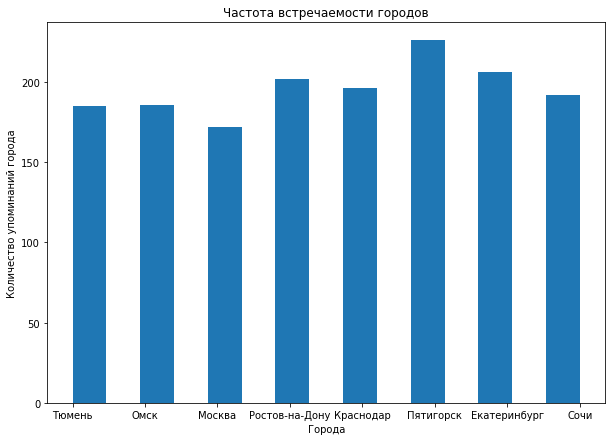

In [13]:
plt.subplots(figsize =(10, 7))
plt.hist(users['city'], bins=15)
plt.title('Частота встречаемости городов')
plt.ylabel('Количество упоминаний города')
plt.xlabel('Города')
users['city'].value_counts()

Здесь мы можем наблюдать, что наиболее часто встречается город Пятигорск, за ним идут Екатеринбург и Ростов-на-Дону. Наименее часто встраются такие города как Москва, Тюмень и Омск. Однако в общем и целом частота встречаемости городов распределена достаточно ровно.

#### Соотношение пользователей с подпиской и без подписки.

free     846
ultra    719
Name: subscription_type, dtype: int64

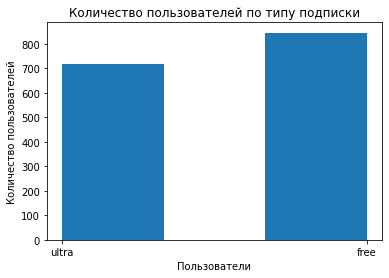

In [14]:
plt.hist(users['subscription_type'], bins=3)
plt.title('Количество пользователей по типу подписки')
plt.ylabel('Количество пользователей')
plt.xlabel('Пользователи')
users['subscription_type'].value_counts()


In [15]:
free_users = users['subscription_type'].loc[users['subscription_type'] == 'free']
ultra_users = users['subscription_type'].loc[users['subscription_type'] == 'ultra']
print('Отношение пользователей с подпиской к общему числу пользователей равно:', ultra_users.count() / (ultra_users.count() + free_users.count()))
print('Отношение пользователей без подписки к общему числу пользователей равно:', free_users.count() / (ultra_users.count() + free_users.count()))     

Отношение пользователей с подпиской к общему числу пользователей равно: 0.4594249201277955
Отношение пользователей без подписки к общему числу пользователей равно: 0.5405750798722044


Для большей наглядности построим также круговую диаграмму.

([<matplotlib.patches.Wedge at 0x7f144104aac0>,
 [Text(-0.13983801817517755, 1.0910753084333085, 'free'),
  Text(0.1398380181751779, -1.0910753084333082, 'ultra')])

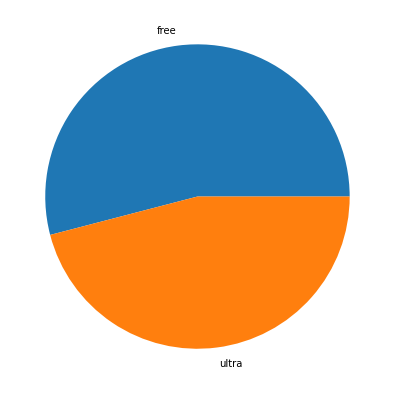

In [16]:
subbs_count = [free_users.count(), ultra_users.count()]
subs_type = ['free', 'ultra']
fig = plt.figure(figsize =(10, 7))
plt.pie(subbs_count, labels = subs_type)

Здесь мы может наблюдать, что количество пользователей без подписки превышает количество пользователей с подпиской. Количество пользователей без подписки составляет около 54 процентов, в свою очередь количество пользователей с подпиской ополо 46 процентов

#### Возраст пользователей

Text(0, 0.5, 'Количество пользователей')

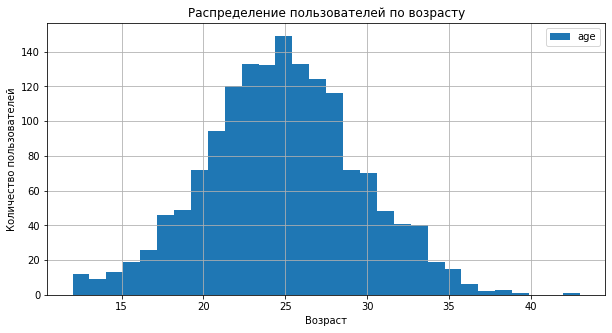

In [18]:
users.plot(kind='hist',y='age',grid=True, bins=30, figsize=(10,5),title='Распределение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

Здесь мы может наблюдать, что наибольшее число пользователей находится в возрастных рамках от 20 до 30 лет. Также можно сделать вывод, что пользователей старше 35 лет наименьший процент.

#### Расстояние, которое пользователь преодолел за одну поездку

Text(0, 0.5, 'Количество поездок')

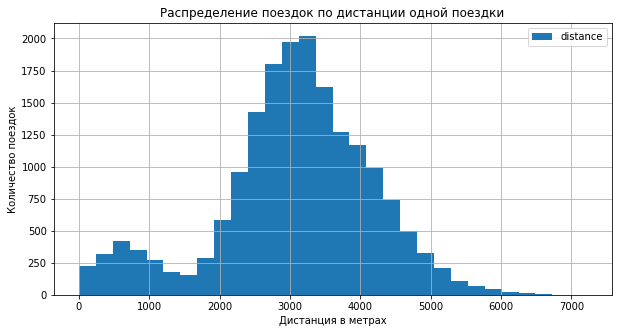

In [19]:
rides.plot(kind='hist',y='distance',grid=True, bins=30, figsize=(10,5),title='Распределение поездок по дистанции одной поездки')
plt.xlabel('Дистанция в метрах')
plt.ylabel('Количество поездок')

Можно сделать вывод, что большинство пользователей проезжает от 2 до 4 км. Это вполне логично, ведь на такой дистанции самокат эффективнее пешей прогулки или общественного транспорта. Идти пешком слишком долго, а общественный транспорт вероятнее всего придётся ожидать, иногда дольше, чем само время в пути. Что касается небольшого роста пользователей на дистанции в 500 метров, то это может происходить из-за обнаружения поломки самоката и прекращения поездки.

#### Продолжительность поездок

Text(0, 0.5, 'Количество поездок')

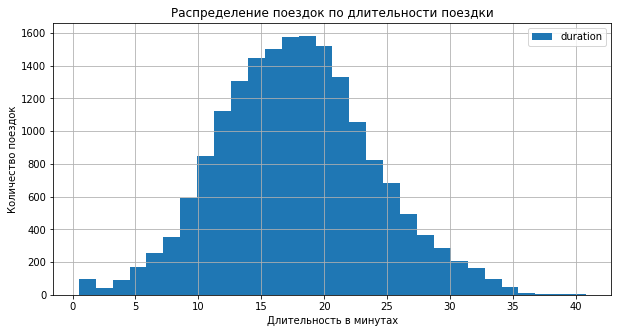

In [20]:
rides.plot(kind='hist',y='duration',grid=True, bins=30, figsize=(10,5),title='Распределение поездок по длительности поездки')
plt.xlabel('Длительность в минутах')
plt.ylabel('Количество поездок')

Наибольшее число поездок длится до 10 до 25 минут, что вполне логично, если взглянуть на график с распределением по дистанции. Учитывая что самокаты ездят со скоростью около 20км/ч, как раз примерно около 20 минут нужно будет, чтобы преодолеть около 3км.
Что касается поездок с длительностью меньше 5 минут, то они могут быть также, как и не графике выше, связаны с поломками/низким зарядом самоката. Длительность более 30 минут может быть обеспечена теми пользоваталями, которые арендуют самокаты не с конкретной целью, а просто "покататься".

#### Вывод:
* Наиболее частовстречаемые города у пользователей: Пятигорск, Екатеринбург и Ростов-на-Дону, наименее встречаемые Тюмень, Омск и Москва. Однако в общем и целом, количество пользователей по городам распределено достаточно равномерно.
* Количество пользователей без подписки превышает количество пользователей с подпиской примерно на 15 процентов.
* Наибольшее количество пользователей находятся в возрастной категории от 20 до 30 лет. Пользователей старше 35 лет крайне мало.
* Наиболее часто пользователи совершают поездку на дистанцию от 2 до 4 км. При этом на графике выделяются поездки от 0 до 1000 метров, предположительно причиной могут быть самокаты с низким зарядом или поломкой.
* Наиболее часто длительность поездки составляет от 10 до 25 минут, что хорошо соотносится с наиболее частой дистанцией поездки.


### Шаг 4. Объединение данных

#### Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge()

In [21]:
users_rides_subs = users.merge(rides, on='user_id')
users_rides_subs = users_rides_subs.merge(subs, on='subscription_type')
users_rides_subs

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1.0,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1.0,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1.0,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1.0,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1.0,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534.0,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534.0,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534.0,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534.0,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


#### Из датафрейма users_rides_subs, созданного выше, создадим ещё два датафрейма, один с пользователями без подписки, второй с пользователями с подпиской

In [22]:
ultra_users_rides = users_rides_subs.loc[users_rides_subs['subscription_type'] == 'ultra']
free_users_rides = users_rides_subs.loc[users_rides_subs['subscription_type'] == 'free']
display(ultra_users_rides)
free_users_rides

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1.0,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1.0,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1.0,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1.0,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1.0,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699.0,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699.0,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699.0,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699.0,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700.0,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700.0,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700.0,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700.0,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700.0,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534.0,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534.0,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534.0,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534.0,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


#### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Text(0, 0.5, 'Количество поездок')

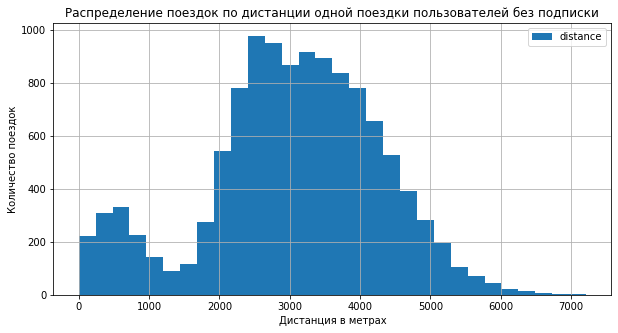

In [23]:
free_users_rides.plot(kind='hist',y='distance',grid=True, bins=30, figsize=(10,5),title='Распределение поездок по дистанции одной поездки пользователей без подписки')
plt.xlabel('Дистанция в метрах')
plt.ylabel('Количество поездок')

Text(0, 0.5, 'Количество поездок')

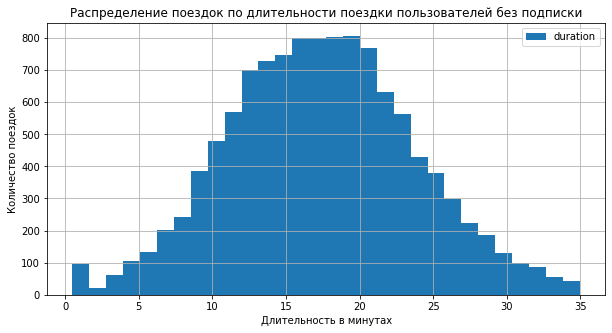

In [24]:
free_users_rides.plot(kind='hist',y='duration',grid=True, bins=30, figsize=(10,5),title='Распределение поездок по длительности поездки пользователей без подписки')
plt.xlabel('Длительность в минутах')
plt.ylabel('Количество поездок')

Text(0, 0.5, 'Количество поездок')

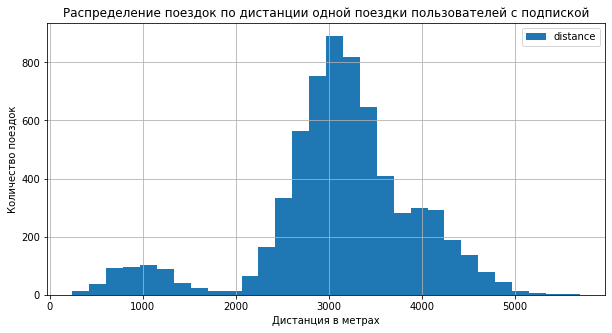

In [25]:
ultra_users_rides.plot(kind='hist',y='distance',grid=True, bins=30, figsize=(10,5),title='Распределение поездок по дистанции одной поездки пользователей с подпиской')
plt.xlabel('Дистанция в метрах')
plt.ylabel('Количество поездок')

Text(0, 0.5, 'Количество поездок')

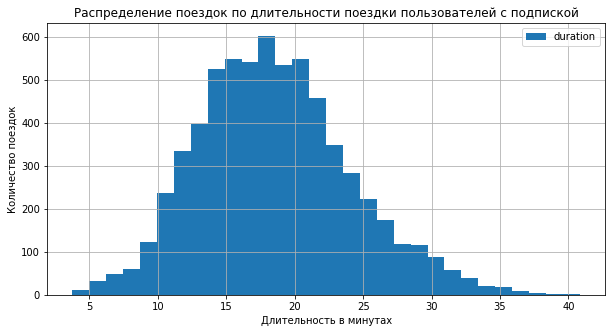

In [26]:
ultra_users_rides.plot(kind='hist',y='duration',grid=True, bins=30, figsize=(10,5),title='Распределение поездок по длительности поездки пользователей с подпиской')
plt.xlabel('Длительность в минутах')
plt.ylabel('Количество поездок')

На графиках мы может наблюдать ожидаемое распределение, дествительно дистанция поездок связана с длительностью поездки. Также можно сделать вывод, что данные об обеих категориях пользователей распределены очень похоже, не считая того, что пользователи с бесплатной подпиской совершают больше коротких поездок, вероятно это связано с тем, что среди пользователей без подписки больше новых пользователей, которые могли совершить короткую поездку по ряду причин, например: решили попробовать, но не понравилось, не разобрались в программе и окончили поездку, не проверили заряд батареи самоката. Также похоже, что пользователи с подпиской совершают немного больше более длительных поездок.

#### Вывод
* Собрали все данные из трёх датафреймов в один.
* Создали ещё два датафрейма с пользователями с подпиской и с пользователями без подписки.
* Визуализировали данные о длительности и дистанции поездок пользователей с подпиской и без. Установили, что распределение достаточно похоже, однако пользователи без подписки совершают значительно больше коротких поездок.

### Шаг 5. Подсчёт выручки

Найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц и создадим датафрейм с агрегированными данными. Длительность поездки округлим в большую сторону.

In [27]:
users_rides_subs['duration'] = np.ceil(users_rides_subs['duration'])
agg_data = users_rides_subs.pivot_table(index=['user_id', 'month'], values = ['distance', 'duration', 'name', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'], aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type': 'min', 'minute_price': 'min', 'start_ride_price': 'min', 'subscription_fee': 'min'})
agg_data.columns = ['total_distance', 'total_duration', 'minute_price', 'rides_count', 'start_ride_price', 'subscription_fee', 'subscription_type']
agg_data.reset_index()
agg_data

total_distance  total_duration  minute_price  rides_count  \
user_id month                                                              
1.0     1         7027.511294            42.0             6            2   
        4          754.159807             7.0             6            1   
        8         6723.470560            46.0             6            2   
        10        5809.911100            32.0             6            2   
        11        7003.499363            56.0             6            3   
...                       ...             ...           ...          ...   
1534.0  6         3409.468534            26.0             8            2   
        8         7622.453034            48.0             8            2   
        9         4928.173852            23.0             8            1   
        11       13350.015305            78.0             8            4   
        12        2371.711192            16.0             8            1   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1.0     1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra  
...                         ...               ...               ...  
1534.0  6                    50                 0              free  
        8                    50                 0              free  
        9                    50                 0              free  
        11                   50                 0              free  
        12                   50                 0              free  

[11331 rows x 7 columns]

В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [28]:
agg_data['income'] = agg_data['start_ride_price']*agg_data['rides_count'] + agg_data['minute_price'] * agg_data['total_duration'] + agg_data['subscription_fee']
agg_data

total_distance  total_duration  minute_price  rides_count  \
user_id month                                                              
1.0     1         7027.511294            42.0             6            2   
        4          754.159807             7.0             6            1   
        8         6723.470560            46.0             6            2   
        10        5809.911100            32.0             6            2   
        11        7003.499363            56.0             6            3   
...                       ...             ...           ...          ...   
1534.0  6         3409.468534            26.0             8            2   
        8         7622.453034            48.0             8            2   
        9         4928.173852            23.0             8            1   
        11       13350.015305            78.0             8            4   
        12        2371.711192            16.0             8            1   

               start_ride_price  subscription_fee subscription_type  income  
user_id month                                                                
1.0     1                     0               199             ultra   451.0  
        4                     0               199             ultra   241.0  
        8                     0               199             ultra   475.0  
        10                    0               199             ultra   391.0  
        11                    0               199             ultra   535.0  
...                         ...               ...               ...     ...  
1534.0  6                    50                 0              free   308.0  
        8                    50                 0              free   484.0  
        9                    50                 0              free   234.0  
        11                   50                 0              free   824.0  
        12                   50                 0              free   178.0  

[11331 rows x 8 columns]

In [29]:
# Код ревьюера
agg_data.groupby('subscription_type')['income'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: income, dtype: float64

### Шаг 6. Проверка гипотез

#### Первая гипотеза
Нулевая гипотеза: средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки.
<p> Альтернативная гипотеза: Средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки. </p>

In [30]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(ultra_users_rides['duration'], free_users_rides['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Гипотеза опровергнута, есть основания полагать, что пользователи с подпиской тратят больше времени на поездки.

#### Вторая гипотеза 
<p> Нулевая гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. </p>
Альтернативная гипотеза: расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [31]:
ideal_distance = 3130
alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    ultra_users_rides['distance'], 
    ideal_distance,
      alternative='greater')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Не получилось опровергнуть гипотезу, похоже расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

#### Третья гипотеза. 
Нулевая гипотеза: средняя выручка пользователей с подпиской равна средней выручке пользователей без подписки. 
<p>Альтернативная гипотеза: средняя выручка пользователей с подпиской больше  чем средняя выручка пользователей без подписки.</p>

In [32]:
income_free = agg_data.loc[agg_data['subscription_type'] == 'free']
income_ultra = agg_data.loc[agg_data['subscription_type'] == 'ultra']
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(income_ultra['income'], income_free['income'],  alternative='greater')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Гипотеза опровергнута, похоже что помесячная выручка от пользователей с подпиской по месяцам больше, чем средняя выручка от пользователей без подписки.

#### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Я бы применил метод scipy.stats.ttest_rel(old_data, new_data) Это двустороння гипотеза:
Нулевая гипотеза: После обновления сервера количество обращений в техподдержку равно количеству обращений до обновления.
Альтернативная гипотеза: После обновления сервера количество обращений в техподдержку меньше количества обращений до обновления.

#### Вывод

Мы провели исследование данных о пользователях, поездках и подписках, в ходе исследования удалось сделать следующие выводы:
* Собранные достаточно чистые, практически не пришлось их обрабатывать, за исключением нескольких деталей. Однако, позже было обнаружено, что есть странные данные о длительности и дистанции поездок, имеют место поездки на дистанцию свыше 4км и нулевой длительностью, возможно ошибка в системе сбора данных. Количество таких данных мало и на общее исследование не повлияло.
* Далее были проанализированы следующие данные: 1) Частота встречаемости городов, города распределены достаточно равномерно, наиболее количество пользователей в Пятигорске, Екатеринбурге, Ростве-на-Дону, наименьшее в Тюмене, Омске и Москве. 2) Соотношение пользователей с подпиской и без подписки. Пользователей без подписки составляют около 54 процентов, в свою очередь пользователи с подпиской около 46 процентов. 3)Возраст пользоватей: наибольшее число пользователей в возрастной категории от 20 до 30 лет, пользователей старше 35 лет практически нет. 4)Расстояние, которое преодолел пользователь за одну поездку и длительность одной поездки распределены достаточно логично. Наибольшее число поездок лежит в диапозоне от 2 до 4 км, в своб очередь длительность от 10 до 25. Однако было обнаружены, что достаточно большое количество аномально коротких поездок(до 1км и до 5 минут), особенно часто такие поездки встречаются у пользователей без подписки, вероятные причины: пользователь остался недоволен самокатом, самокат имел низкий заряд батареи, самокат имел поломку, пользователь не разобрался в управлении. 
* Также была подсчитана выручка для пользователей с подпиской и без подписки, и на основе этих и других данные были проверены следующие гипотезы: 1) Средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки — опровергнута. 2) Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров — не опровергнута. 3)Средняя выручка пользователей с подпиской равна средней выручке пользователей без подписки. — опровергнута.
<p>Подводя общий итог, можно сказать, что пользователи с подпиской являются более выгодными для компании. Гипотеза о равенстве средней продолжительности поездки была опровергнута, следовательно есть основания полагать, что пользователи с подпиской тратят больше времени на поездки. В свою очередь гипотеза о равенстве дохода от пользователей с подпиской и без, также была опровергнута, следовательно вероятнее всего пользователи с подпиской приносят больший помесячный доход. Помимо этого, пользователи с подпиской в среднем не проезжают больше идеального для эксплуатации самоката расстояния в 3130 метров. </p>